In [10]:
import numpy as np
from pymanopt.manifolds import Sphere
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import vanilla_LA.potentials
import vanilla_LA.utils as my
import vanilla_LA.metropolis_hastings as vanilla_mh
import vanilla_LA.MA_metropolis_hastings as mamh

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/adeladepavia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


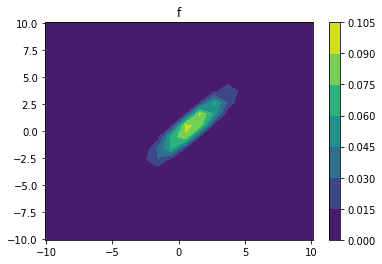

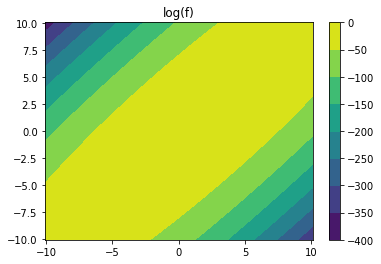

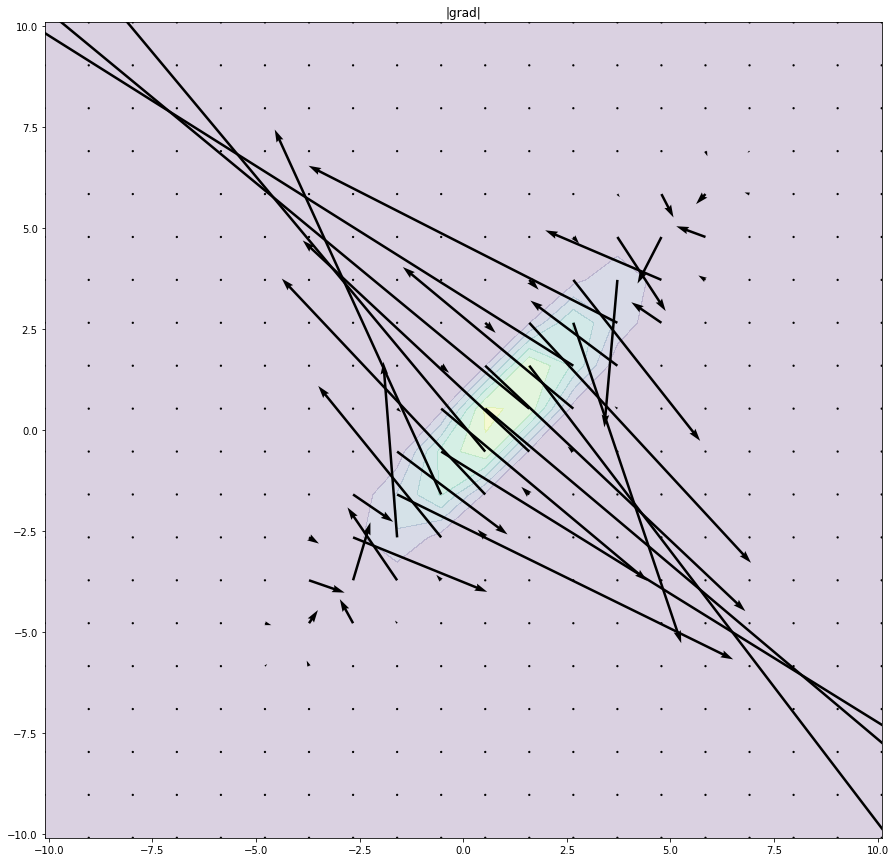

In [5]:
Sigma = 3*np.array([[ 1. , 1.0], [1.0,  1.2]])
Mu = np.array([1,0.5])

H = vanilla_LA.potentials.Gaussian(ambient_dim=2,
                                   proper_dim = 2,mu = Mu,cov=Sigma)
my.plot_potential(H,[-10,10])

# Compare how quickly manifold langevin converges vs vanilla langevin

Compare multiple methods of calculating Fisher information matrix

Manifold-Adjusted MALA


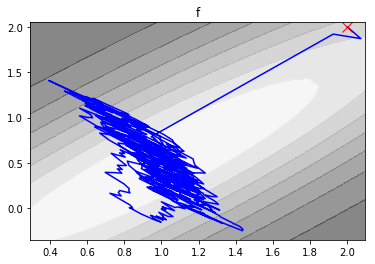

Last  100  samples: estimated covariance
[[ 0.02230725 -0.03681771]
 [-0.03681771  0.07217175]]


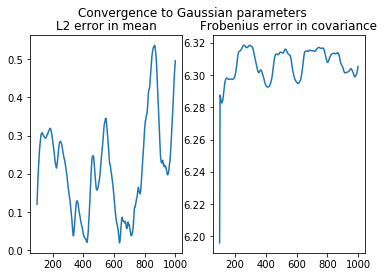

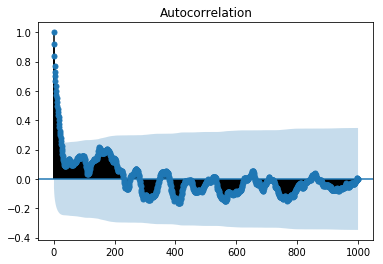

MALA


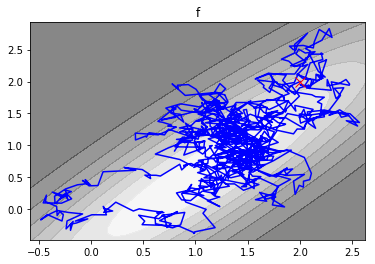

Last  100  samples: estimated covariance
[[0.10571192 0.00331786]
 [0.00331786 0.04700562]]


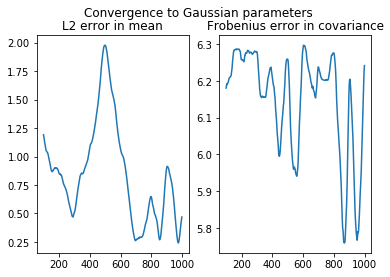

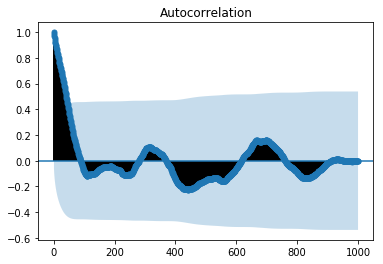

Gaussian


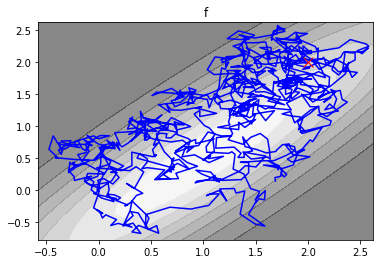

Last  100  samples: estimated covariance
[[ 0.14658125 -0.030845  ]
 [-0.030845    0.23985084]]


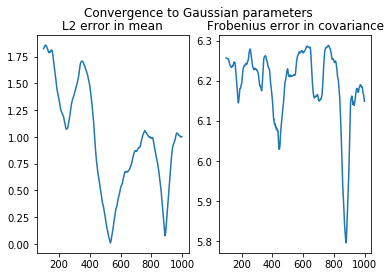

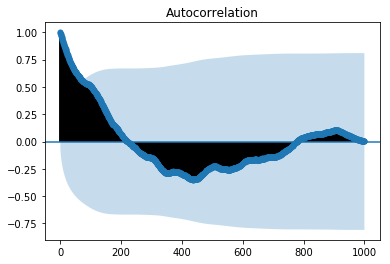

In [32]:
x_0 = 2*np.array([1,1])
T = 1000
step_size = 0.1

# Use the observed Fisher information matrix as an approximation of the 
# Fisher-Rao metric
print('Manifold-Adjusted MALA')
info_matrix = (lambda x,traj : mamh.empirical_Fisher_metric(H,x,traj))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,info_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

# Vanilla
print('MALA')
identity_matrix = (lambda x,_ : np.identity(x.size))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,identity_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

# Gaussian update
print('Gaussian')
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,_: vanilla_mh.gaussian(_,x,radius=step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

